In [1]:
experiment_name = 'CDR'
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# %run init.py

print "Setting up variables & DB connection for experiment:\n"
print "*******************\n%s\n*******************"%experiment_name

# point to appropriate DBs, pickle files etc.
pkl_paths = 'pickles/%s/'%experiment_name
path_candidate_dict_pkl = pkl_paths+ 'candidate_dict.pickle' # TODO rename that
path_pubmed_ids_pkl = pkl_paths + 'pubmed_ids.pickle'
path_base_learners = pkl_paths + 'base_learner_predictions' # TODO create dirs


# Shortcuts to connect to database, initialize candidate subclass and return snorkel session
import os
#TODO: set experiment_name and restructure dir
os.environ['SNORKELDB'] = 'postgres:///snorkel'+experiment_name

from snorkel import SnorkelSession
session = SnorkelSession()
from snorkel.models import  Document, Sentence
import matplotlib.pyplot as plt
from snorkel.annotations import save_marginals
from snorkel.models import Candidate, candidate_subclass
ChemicalDisease = candidate_subclass('ChemicalDisease', ['chemical', 'disease'])

print "\nSnorkel session connected to: ",os.environ['SNORKELDB']

Setting up variables & DB connection for experiment:

*******************
CDR
*******************


/home/antonis/anaconda2/envs/snorkel27/lib/python2.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)



Snorkel session connected to:  postgres:///snorkelCDR


In [3]:
import pickle,glob
from MLutils import  diversity_heatmap, merge_pickles_pred_dicts, diversity_matrix
from sklearn.metrics import  accuracy_score, cohen_kappa_score

In [4]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [5]:
from MLutils import reduce_results_dict, diversity_heatmap

In [6]:
import pandas as pd

In [7]:
pickle_list = glob.glob(path_base_learners+'/*.pkl')

In [8]:
pickle_list

['pickles/CDR/base_learner_predictions/CNN_no_trim,RuS.pkl',
 'pickles/CDR/base_learner_predictions/results_dict,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1),.pkl',
 'pickles/CDR/base_learner_predictions/results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3),LSA200,.pkl',
 'pickles/CDR/base_learner_predictions/results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_stopw=english,_ngrams=(1, 1),.pkl',
 'pickles/CDR/base_learner_predictions/results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),.pkl',
 'pickles/CDR/base_learner_predictions/results_dict,ShortDepPath,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1),LSA200,.pkl',
 'pickles/CDR/base_learner_predictions/results_dict,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1),LSA200,.pkl',
 'pickles/CDR/base_learner_predictions/results_dict,trim=0,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200,.pkl',
 'pickles/CDR/base_learner_predictions/results_dict,trim=0,lemmas,RuS,TfIdf_,m

In [9]:
## create sample heatmap to demonstrate K-means clustering

In [10]:
results_dict = merge_pickles_pred_dicts(pickle_list, f1_threshold=0.4,best_model=False)

Merged 110 different model variations


In [11]:
import random

In [12]:
from MLutils import reduce_results_dict,diversity_heatmap, cohen_kappa_score

Index([u'results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=250',
       u'results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_stopw=english,_ngrams=(1, 1),LSA200_SVC_rbf_C=75',
       u'results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_stopw=english,_ngrams=(1, 1)_SVC_rbf_C=250',
       u'results_dict,ShortDepPath,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=150',
       u'results_dict,ShortDepPath,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1)_LogisticRegression',
       u'results_dict,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_RandomForestClassifier',
       u'results_dict,trim=0,lemmas,RuS,CV_,bin_,minFreq=5,_stopw=english,_ngrams=(1, 1),LSA200_SVC_rbf_C=75',
       u'results_dict,trim=0,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=75',
       u'results_dict,trim=0,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1)_LogisticRegression',
       u'results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=5,_ngr

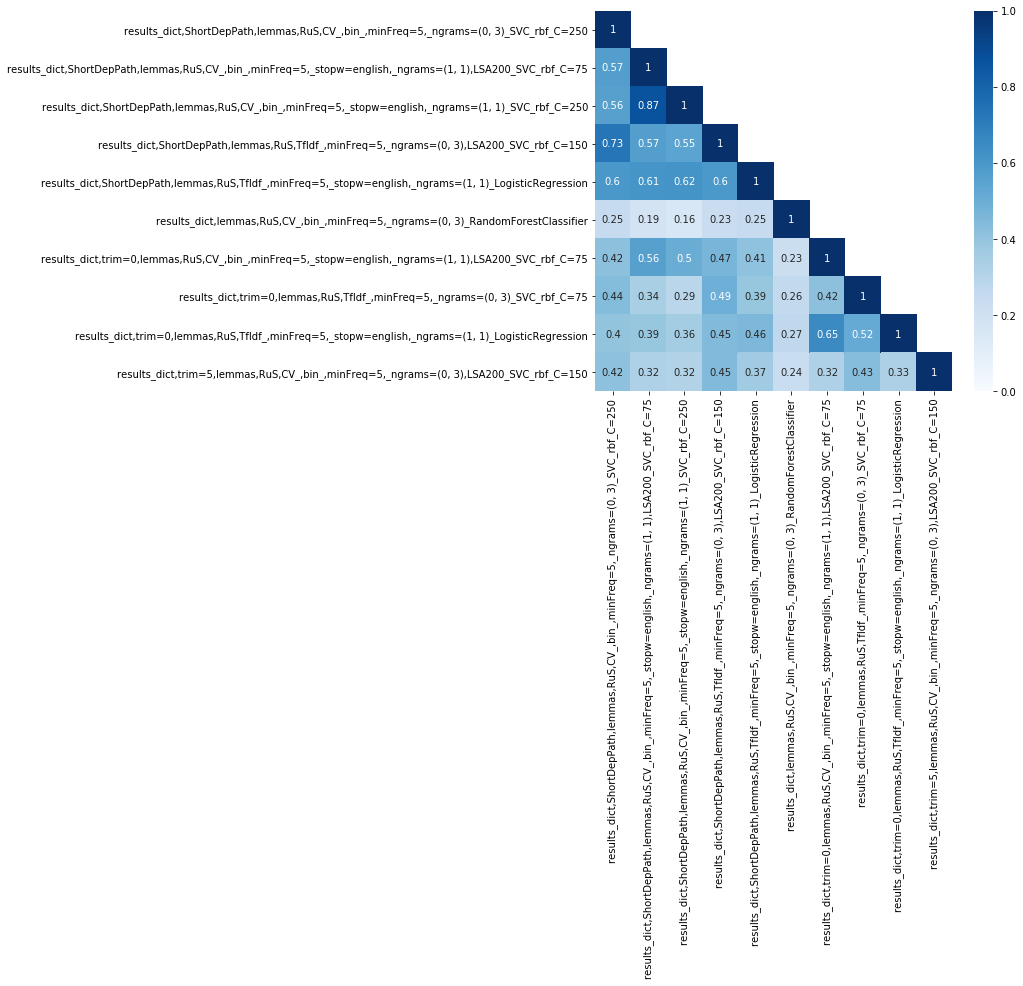

In [15]:
picked_models = random.sample(results_dict.keys(), 10)
diversity_heatmap(reduce_results_dict(results_dict,picked_models), 
                  metric=cohen_kappa_score ,plot_model_names=True,
                 figsize=(8,7)
                 )


Index([u'Model 0', u'Model 1', u'Model 2', u'Model 3', u'Model 4', u'Model 5',
       u'Model 6', u'Model 7', u'Model 8', u'Model 9'],
      dtype='object')


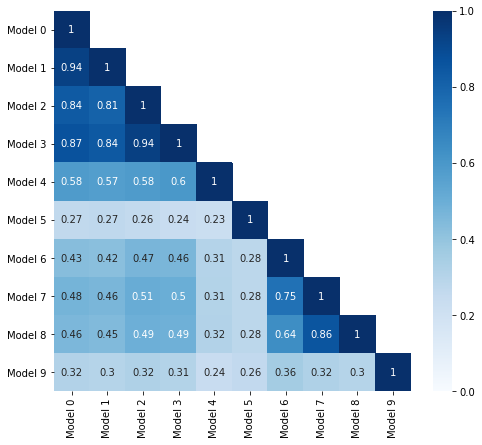

In [16]:
picked_models = random.sample(results_dict.keys(), 10)
diversity_heatmap(reduce_results_dict(results_dict,picked_models), 
                  metric=cohen_kappa_score ,plot_model_names=False,
                 figsize=(8,7)
                 )


In [17]:
# # remove fasttext because I still need to fix the dictionary
# del results_dict['fasttext_fasttext']

In [18]:
ml_models = results_dict.keys()
ml_models.sort()

In [19]:
from sklearn.metrics import cohen_kappa_score, accuracy_score

In [20]:
# run to determine whether dicts are ok

# for key in results_dict.keys():
#     print key
#     print results_dict[key].keys()
    
#     print ''

# Clustering on diversity matrix

In [21]:
# Load data

In [22]:
ml_models = results_dict.keys()

In [23]:
X = diversity_matrix(results_dict)

In [24]:
# Clustering directly with prediction matrix

# X = pd.DataFrame()
# for key in ml_models:
#     X[key] = pd.Series(results_dict[key]['label_val_binary'])

### Determine optimal # of clusters

In [25]:
# from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# from __future__ import print_function

from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [26]:
range_n_clusters = range(2,30)

In [27]:
from sklearn.cluster import KMeans

In [28]:
silh_score = pd.Series(index=range_n_clusters)

for n_clusters in range_n_clusters:
    print "Running for %i clusters"%n_clusters
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
    clusterer =  KMeans(n_clusters=n_clusters )
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    silh_score.loc[n_clusters] = silhouette_avg
    
#     print("For n_clusters =", n_clusters,
#           "The average silhouette_score is :", silhouette_avg)


Running for 2 clusters
Running for 3 clusters
Running for 4 clusters
Running for 5 clusters
Running for 6 clusters
Running for 7 clusters
Running for 8 clusters
Running for 9 clusters
Running for 10 clusters
Running for 11 clusters
Running for 12 clusters
Running for 13 clusters
Running for 14 clusters
Running for 15 clusters
Running for 16 clusters
Running for 17 clusters
Running for 18 clusters
Running for 19 clusters
Running for 20 clusters
Running for 21 clusters
Running for 22 clusters
Running for 23 clusters
Running for 24 clusters
Running for 25 clusters
Running for 26 clusters
Running for 27 clusters
Running for 28 clusters
Running for 29 clusters


Text(0.5,1,'CDR classifiers')

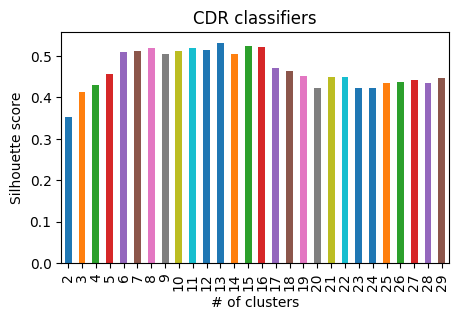

In [30]:
plt.style.use('default')
silh_score.plot(figsize=(5,3), kind='bar',)
plt.xlabel('# of clusters')
plt.ylabel('Silhouette score')
plt.title("CDR classifiers")

In [48]:
from MLutils import pick_centroid_models

In [51]:
keys = pick_centroid_models(X,KMeans(n_clusters=6)) # select which models will be the centroids/keys

Index([u'results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_LogisticRegression',
       u'results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_stopw=english,_ngrams=(1, 1)_LogisticRegression',
       u'results_dict,lemmas,RuS,CV_,bin_,minFreq=5,_stopw=english,_ngrams=(1, 1),LSA200_RandomForestClassifier',
       u'results_dict,trim=0,lemmas,RuS,CV_,bin_,minFreq=5,_stopw=english,_ngrams=(1, 1)_SVC_rbf_C=75',
       u'results_dict,trim=0,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3),LSA200_LogisticRegression',
       u'results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=75'],
      dtype='object')


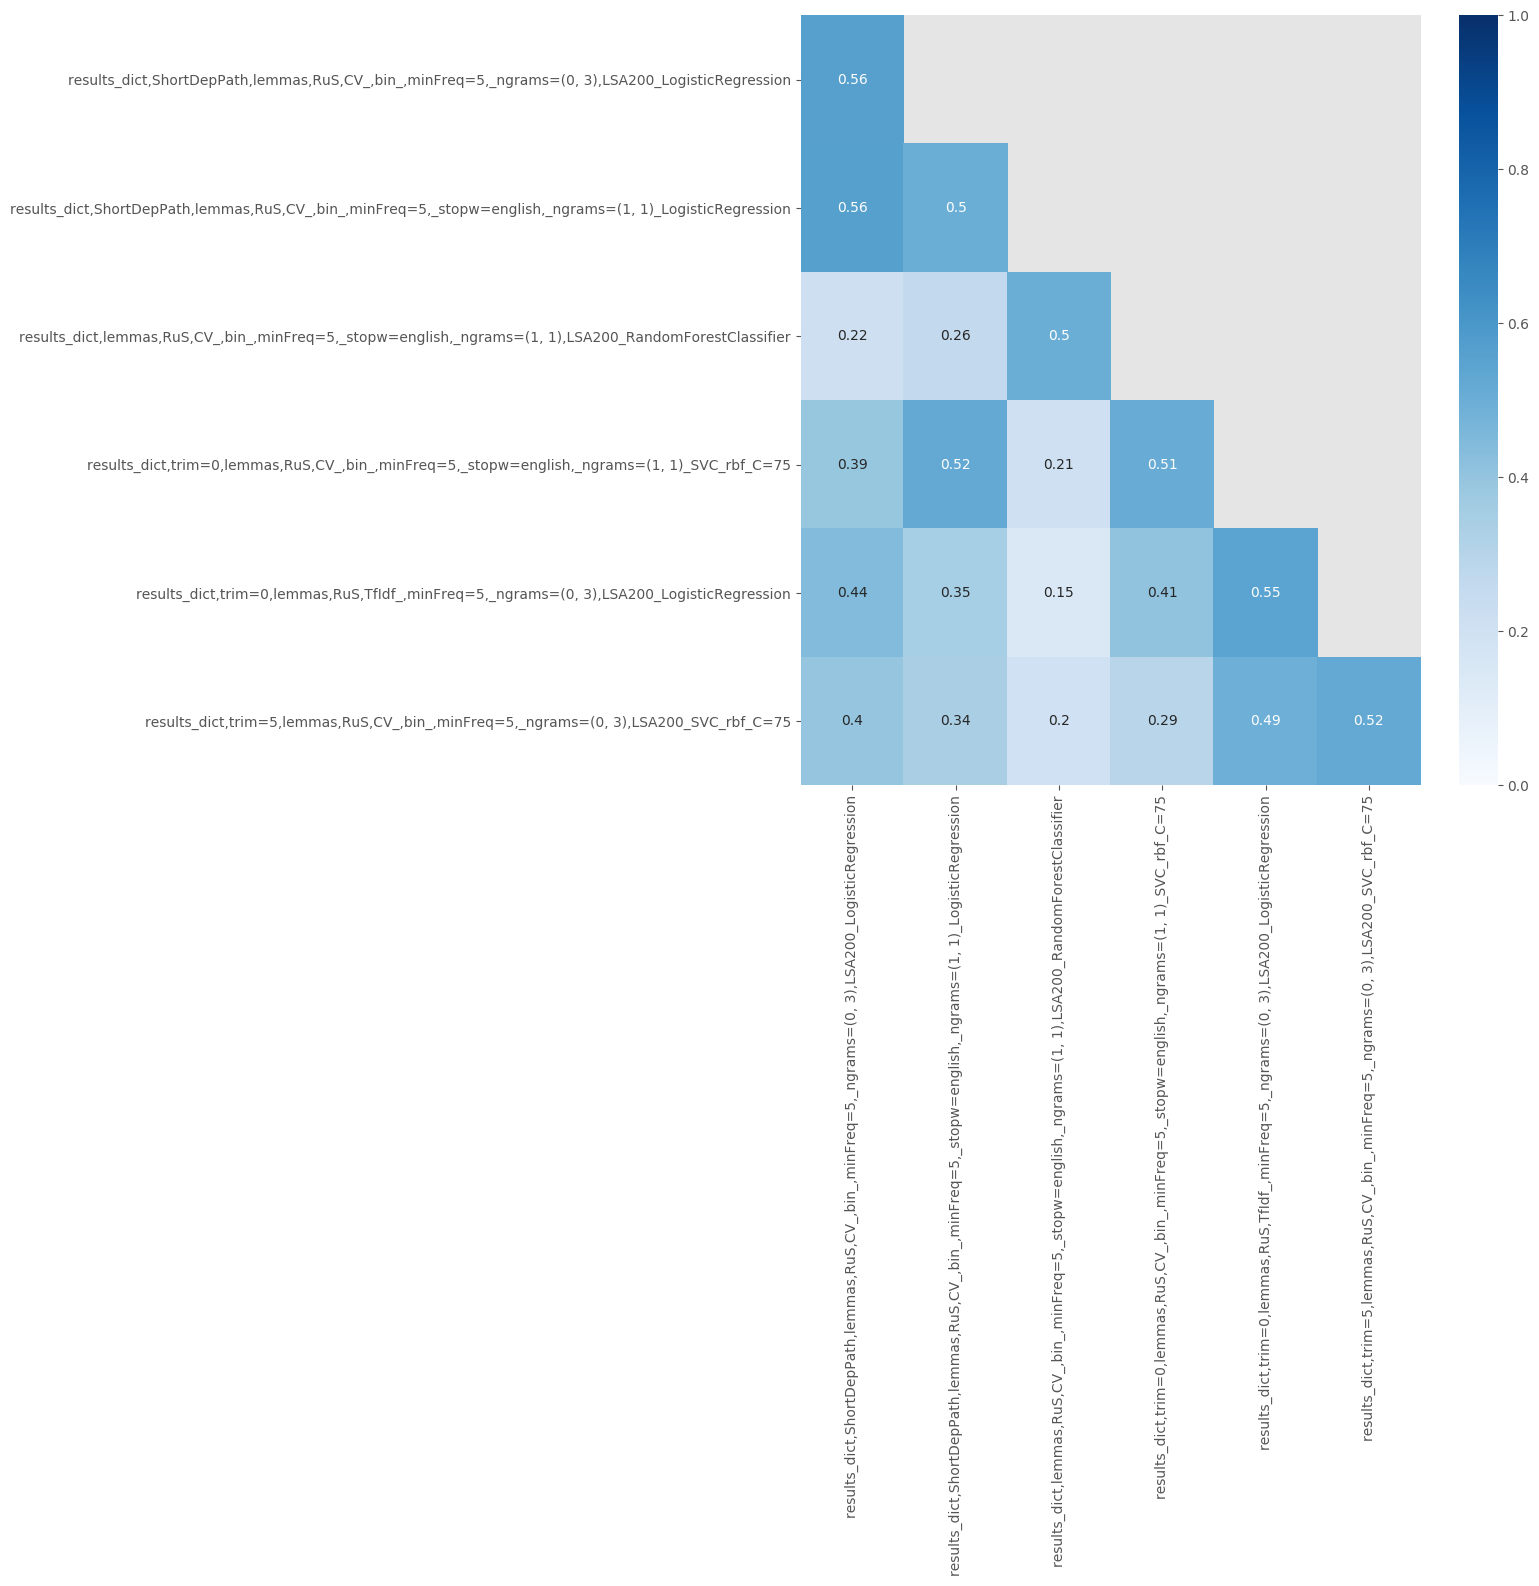

In [55]:
diversity_heatmap(reduce_results_dict(results_dict,keys),diagonal_key='f1+',plot_model_names=True)

In [60]:
X

,"CNN_no_trim,RuS_CNN","CNN_trim=0,RuS_CNN","CNN_trim=5,RuS_CNN","results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_LogisticRegression","results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_RandomForestClassifier","results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_linear","results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=150","results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=250","results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=75","results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_LogisticRegression",...,"results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=150","results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=250","results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=75","results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3),LSA200_LogisticRegression","results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_linear","results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=150","results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=250","results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_LogisticRegression","results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_SVC_linear","results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=75"
"CNN_no_trim,RuS_CNN",1,0.427621,0.612795,0.311122,0.286251,0.318522,0.354891,0.32696,0.36091,0.312704,...,0.427272,0.391656,0.473996,0.519254,0.476615,0.522942,0.545637,0.51891,0.491192,0.0689639
"CNN_trim=0,RuS_CNN",0.427621,1,0.542529,0.452935,0.443068,0.439603,0.440403,0.453125,0.445567,0.435869,...,0.460623,0.436588,0.464407,0.536028,0.495078,0.533493,0.525543,0.558426,0.489948,0.10291
"CNN_trim=5,RuS_CNN",0.612795,0.542529,1,0.368108,0.400203,0.381235,0.418032,0.412766,0.423324,0.368801,...,0.556002,0.49932,0.599804,0.705396,0.648627,0.67885,0.709449,0.723396,0.632821,0.0963798
"results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_LogisticRegression",0.311122,0.452935,0.368108,1,0.588232,0.796945,0.835556,0.83788,0.815673,0.96281,...,0.412485,0.416299,0.410764,0.40689,0.395547,0.392291,0.393163,0.419837,0.39251,0.0633981
"results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_RandomForestClassifier",0.286251,0.443068,0.400203,0.588232,1,0.530443,0.634554,0.602131,0.676264,0.589016,...,0.344576,0.350263,0.340084,0.387671,0.363778,0.437407,0.405012,0.40981,0.337676,0.117669
"results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_linear",0.318522,0.439603,0.381235,0.796945,0.530443,1,0.750487,0.827203,0.704334,0.807739,...,0.381033,0.371435,0.379238,0.389642,0.391222,0.375749,0.376049,0.4026,0.361499,0.0614264
"results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=150",0.354891,0.440403,0.418032,0.835556,0.634554,0.750487,1,0.909785,0.89632,0.855106,...,0.432824,0.424244,0.440185,0.433295,0.418319,0.439456,0.441712,0.455219,0.402577,0.0690676
"results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=250",0.32696,0.453125,0.412766,0.83788,0.602131,0.827203,0.909785,1,0.83258,0.848661,...,0.413942,0.409624,0.421245,0.419441,0.404295,0.416909,0.418897,0.432359,0.383992,0.0675285
"results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=75",0.36091,0.445567,0.423324,0.815673,0.676264,0.704334,0.89632,0.83258,1,0.817616,...,0.438456,0.421234,0.44589,0.442728,0.423446,0.462191,0.455645,0.455645,0.421252,0.0706423
"results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_LogisticRegression",0.312704,0.435869,0.368801,0.96281,0.589016,0.807739,0.855106,0.848661,0.817616,1,...,0.409225,0.413293,0.403169,0.398294,0.387238

# ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ 

# Dim reduction on diversity matrix

In [65]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA(n_components=2)

In [67]:
X2D = pca.fit_transform(X)
X2D = pd.DataFrame(X2D, index=X.index, columns=['x','y'])

In [68]:
from MLutils import visualize_classifiers

<module 'matplotlib.pyplot' from '/home/antonis/anaconda2/envs/snorkel27/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

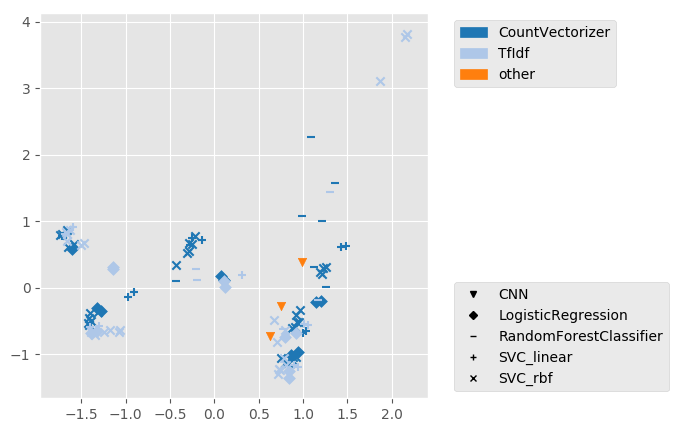

In [69]:
visualize_classifiers(X2D,cat_var2='model', cat_var1='representation',style='ggplot',figsize=(5,5))

In [ ]:
# export classifiers using centroids

In [64]:
from MLutils import centroid_selection

In [ ]:
# TODO: adapt K-medoids and see if result===same
# https://github.com/letiantian/kmedoids

In [72]:
for n_clusters in [5,6,9,10,13,15, 20 ,21]:
    save_path = path_base_learners+'/KMeansPeaks/'+str(n_clusters)+'clusters.pickle'
    
    print '***************************'
    print '*****   %i clusters *******'%n_clusters
    print '***************************'
    
    print 'Silhouette score:', silh_score.loc[n_clusters] 
    
    keys = centroid_selection(X2D,KMeans(n_clusters=n_clusters))
    for key in keys:
        print key , results_dict[key]['f1+']
    
    
    with open(save_path, 'wb') as f:
        pickle.dump(reduce_results_dict(results_dict,keys), f)
    print '\n\n'
    

***************************
*****   5 clusters *******
***************************
Silhouette score: 0.4568676893807671
[0.41983672 0.5108482 ]
[-1.58423784  0.70891346]
[-1.27686314 -0.50702243]
[ 0.88719919 -0.77915481]
[1.81937767 3.23811156]
results_dict,trim=0,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1)_SVC_linear 0.5
results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_stopw=english,_ngrams=(1, 1),LSA200_SVC_rbf_C=75 0.5
results_dict,ShortDepPath,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_linear 0.56
results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_LogisticRegression 0.52
results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=75 0.52



***************************
*****   6 clusters *******
***************************
Silhouette score: 0.5098552278253239
[-1.27686314 -0.50702243]
[ 0.87729788 -0.80004029]
[-0.15201479  0.39651506]
[1.81937767 3.23811156]
[-1.58423784  0.70891346]
[1.2325358  0.62217962]
results_dict,Sho




***************************
*****   21 clusters *******
***************************
Silhouette score: 0.4502322264545389
[-0.94142745 -0.09817386]
[ 1.19661523 -0.14750727]
[2.16091661 3.79432397]
[-1.67655298  0.82785219]
[-0.25387327  0.66165142]
[ 0.83232917 -1.14177287]
[1.45115359 0.61615602]
[ 0.96371813 -0.59380868]
[-1.37193747 -0.44938748]
[1.09308222 2.25901743]
[0.14373612 0.11863511]
[1.16464086 0.29187324]
[1.33086466 1.5059599 ]
[1.86259525 3.10478089]
[-1.14035421  0.30093714]
[1.10381733 1.03918526]
[-1.25633007 -0.65551261]
[ 0.82648105 -0.37756448]
[-0.31798648  0.21359227]
[-1.57834049  0.64667436]
[ 0.73706484 -0.70646678]
results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_SVC_linear 0.57
results_dict,trim=0,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3),LSA200_RandomForestClassifier 0.5
results_dict,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=75 0.5
results_dict,ShortDepPath,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1)_SVC_r

In [74]:
# pick clusters with K-means and vis with PCA

In [75]:
n_clusters = 5
model = KMeans(n_clusters=n_clusters,
#                                 affinity=cohen_kappa_score,
#                                 linkage = 'average'
                               )

X2D['%iclusters'%n_clusters] = model.fit_predict(X.T)

In [76]:
visualize_classifiers(X2D,cat_var2='model', cat_var1='4clusters',)

KeyError: '4clusters'

# pick cluster centrods

In [44]:
X

,"CNN_no_trim,RuS_CNN","CNN_trim=0,RuS_CNN","CNN_trim=5,RuS_CNN","results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_LogisticRegression","results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_RandomForestClassifier","results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_linear","results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=150","results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=250","results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=75","results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_LogisticRegression",...,"results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=150","results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=250","results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=75","results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3),LSA200_LogisticRegression","results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_linear","results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=150","results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=250","results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_LogisticRegression","results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_SVC_linear","results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=75"
"CNN_no_trim,RuS_CNN",1,0.427621,0.612795,0.311122,0.286251,0.318522,0.354891,0.32696,0.36091,0.312704,...,0.427272,0.391656,0.473996,0.519254,0.476615,0.522942,0.545637,0.51891,0.491192,0.0689639
"CNN_trim=0,RuS_CNN",0.427621,1,0.542529,0.452935,0.443068,0.439603,0.440403,0.453125,0.445567,0.435869,...,0.460623,0.436588,0.464407,0.536028,0.495078,0.533493,0.525543,0.558426,0.489948,0.10291
"CNN_trim=5,RuS_CNN",0.612795,0.542529,1,0.368108,0.400203,0.381235,0.418032,0.412766,0.423324,0.368801,...,0.556002,0.49932,0.599804,0.705396,0.648627,0.67885,0.709449,0.723396,0.632821,0.0963798
"results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_LogisticRegression",0.311122,0.452935,0.368108,1,0.588232,0.796945,0.835556,0.83788,0.815673,0.96281,...,0.412485,0.416299,0.410764,0.40689,0.395547,0.392291,0.393163,0.419837,0.39251,0.0633981
"results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_RandomForestClassifier",0.286251,0.443068,0.400203,0.588232,1,0.530443,0.634554,0.602131,0.676264,0.589016,...,0.344576,0.350263,0.340084,0.387671,0.363778,0.437407,0.405012,0.40981,0.337676,0.117669
"results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_linear",0.318522,0.439603,0.381235,0.796945,0.530443,1,0.750487,0.827203,0.704334,0.807739,...,0.381033,0.371435,0.379238,0.389642,0.391222,0.375749,0.376049,0.4026,0.361499,0.0614264
"results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=150",0.354891,0.440403,0.418032,0.835556,0.634554,0.750487,1,0.909785,0.89632,0.855106,...,0.432824,0.424244,0.440185,0.433295,0.418319,0.439456,0.441712,0.455219,0.402577,0.0690676
"results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=250",0.32696,0.453125,0.412766,0.83788,0.602131,0.827203,0.909785,1,0.83258,0.848661,...,0.413942,0.409624,0.421245,0.419441,0.404295,0.416909,0.418897,0.432359,0.383992,0.0675285
"results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=75",0.36091,0.445567,0.423324,0.815673,0.676264,0.704334,0.89632,0.83258,1,0.817616,...,0.438456,0.421234,0.44589,0.442728,0.423446,0.462191,0.455645,0.455645,0.421252,0.0706423
"results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_LogisticRegression",0.312704,0.435869,0.368801,0.96281,0.589016,0.807739,0.855106,0.848661,0.817616,1,...,0.409225,0.413293,0.403169,0.398294,0.387238

In [45]:
# pca = PCA(n_components=4)
# pca.fit_transform(X)

### PCA

In [78]:
pca = PCA(n_components=2)

In [79]:
X_pca = pca.fit_transform(X_preds)

NameError: name 'X_preds' is not defined

In [32]:
X_pca = pd.DataFrame(X_pca, columns=['x','y'], index=X_preds.index)

In [33]:
X_pca['trimming'] = map(lambda x: get_trims(x),X_preds.index)
X_pca['model'] = map(lambda x: get_model(x),X_preds.index)
X_pca['representation'] = map(lambda x: get_representation(x),X_preds.index)
# X_pca['cluster'] = map(lambda x: get_cluster(x),X_preds.index)


In [34]:
X_preds.index

Index([u'CNN_no_trim,RuS_CNN', u'CNN_trim=0,RuS_CNN', u'CNN_trim=5,RuS_CNN',
       u'biLSTM_biLSTM_lr=0.001', u'biLSTM_biLSTM_lr=0.01',
       u'results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_LogisticRegression',
       u'results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_RandomForestClassifier',
       u'results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_linear',
       u'results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=150',
       u'results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_SVC_rbf_C=250',
       ...
       u'results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1),LSA200_SVC_linear',
       u'results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1),LSA200_SVC_rbf_C=150',
       u'results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1),LSA200_SVC_rbf_C=250',

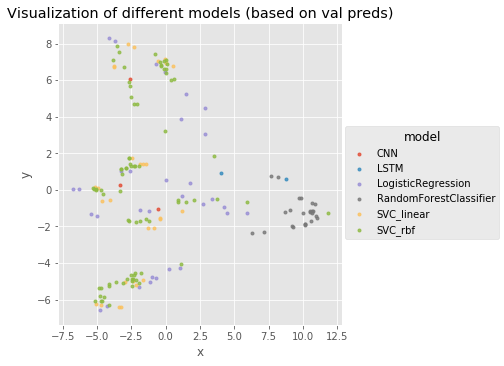

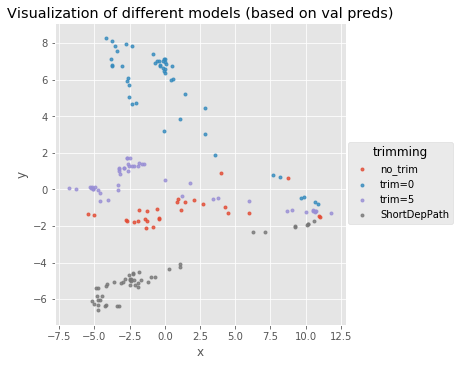

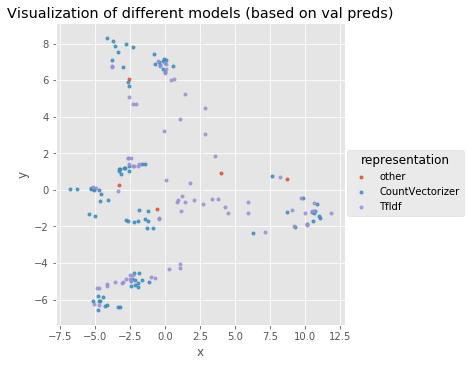

In [35]:
# plt.style.use('default')
# f, (ax1, ax2) = plt.subplots(2, 2, sharey=True, sharex=True)

for i, hue_param in enumerate(['model', 'trimming', 'representation']):

    lm = sns.lmplot('x','y', X_pca, hue=hue_param,
               size=5, markers='.',fit_reg=False,
#                     ax = ax1
                    #x_jitter=.1, y_jitter=.1,
                )

#     axes = lm.axes

    plt.title("Visualization of different models (based on val preds)")

# tSNE

Text(0.5,1,'Visualization of different models (based on val preds)')

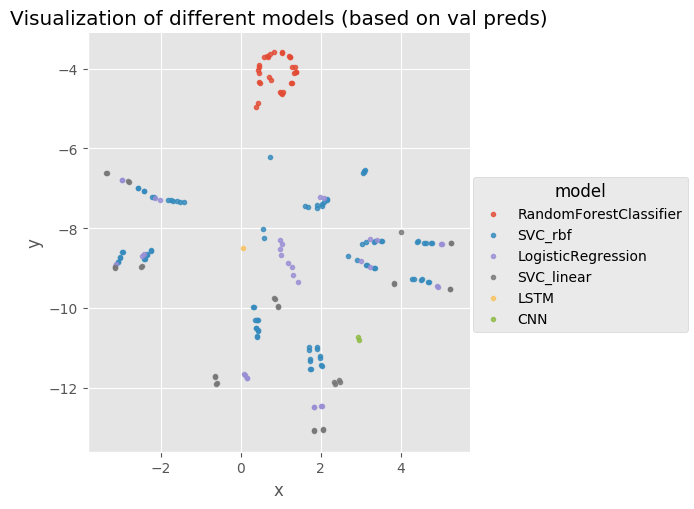

In [80]:

lm = sns.lmplot('x','y', X_tsne, hue='model',
           size=5, markers='.',fit_reg=False,
#                     ax = ax1
                #x_jitter=.1, y_jitter=.1,
            )

#     axes = lm.axes

plt.title("Visualization of different models (based on val preds)")

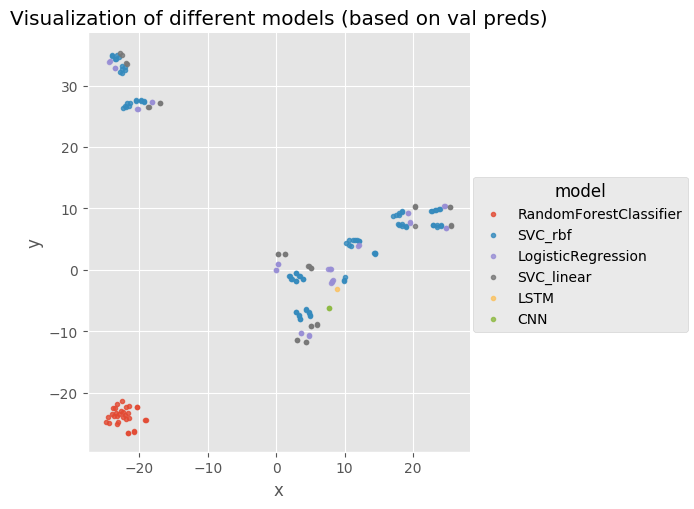

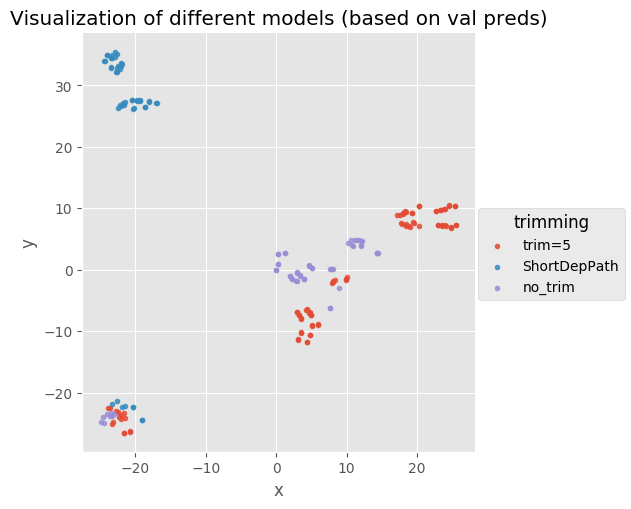

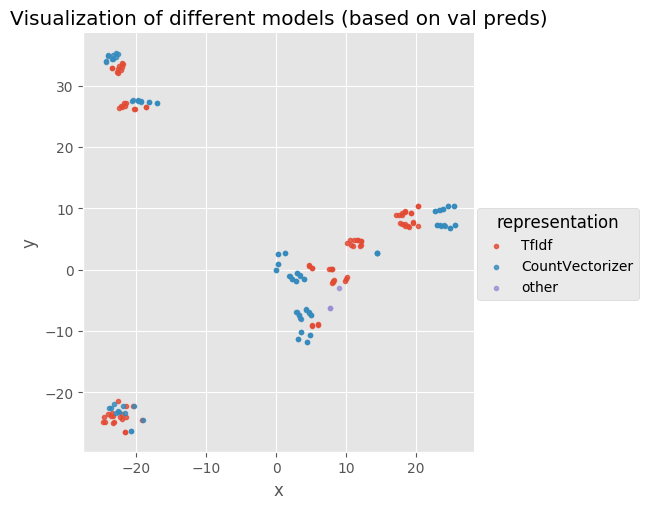

In [75]:
# plt.style.use('default')
# f, (ax1, ax2) = plt.subplots(2, 2, sharey=True, sharex=True)

for i, hue_param in enumerate(['model', 'trimming', 'representation']):

    lm = sns.lmplot('x','y', X_tsne, hue=hue_param,
               size=5, markers='.',fit_reg=False,
#                     ax = ax1
                    #x_jitter=.1, y_jitter=.1,
                )

#     axes = lm.axes

    plt.title("Visualization of different models (based on val preds)")

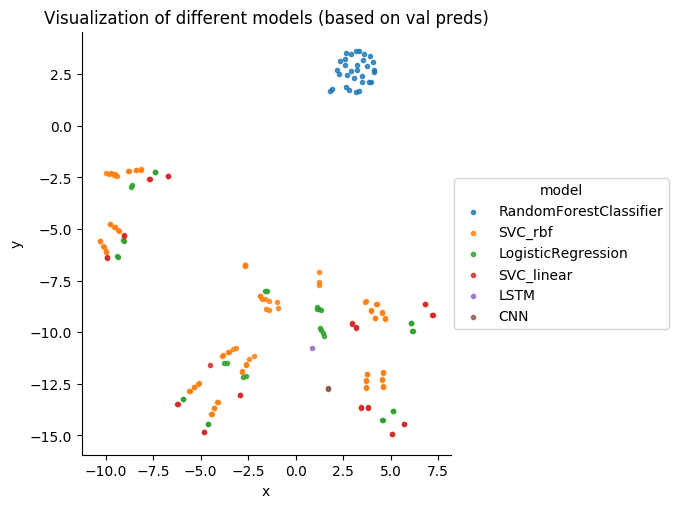

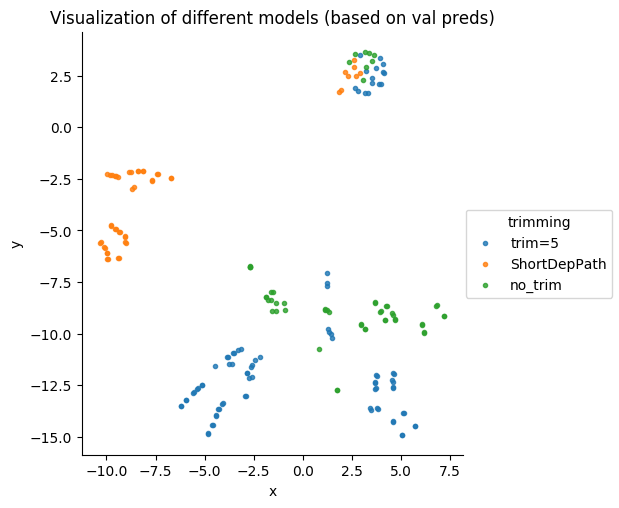

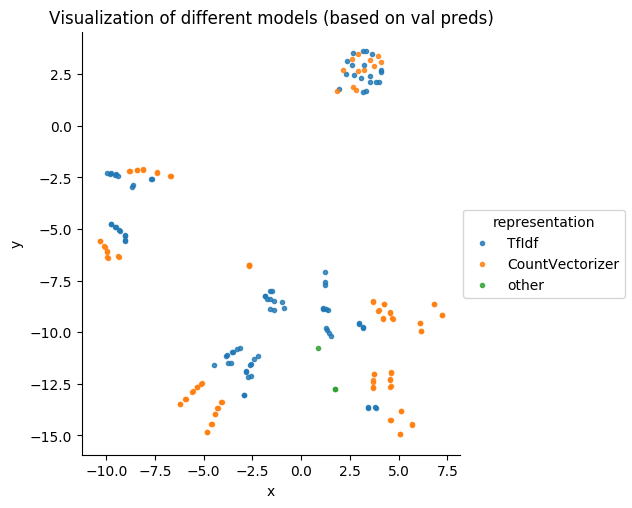

In [42]:
# plt.style.use('default')
# f, (ax1, ax2) = plt.subplots(2, 2, sharey=True, sharex=True)

for i, hue_param in enumerate(['model', 'trimming', 'representation']):

    lm = sns.lmplot('x','y', X_tsne, hue=hue_param,
               size=5, markers='.',fit_reg=False,
#                     ax = ax1
                    #x_jitter=.1, y_jitter=.1,
                )

#     axes = lm.axes

    plt.title("Visualization of different models (based on val preds)")

# After # clusters has been decided

In [115]:
import seaborn as sns

In [63]:
n_clusters = 14

In [64]:
model = KMeans(n_clusters=n_clusters,
#                                 affinity=cohen_kappa_score,
#                                 linkage = 'average'
                               )

Z = model.fit_predict(X.T)

In [65]:
# Visualize where Z lies

In [66]:
X_tsne['5clusters'] = Z
X_pca['5clusters'] = Z

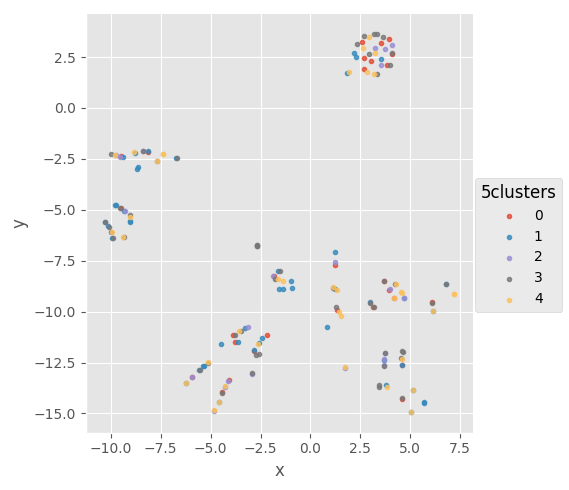

In [68]:
lm = sns.lmplot('x','y', X_tsne, hue='5clusters',
           size=5, markers='.',fit_reg=False
            )

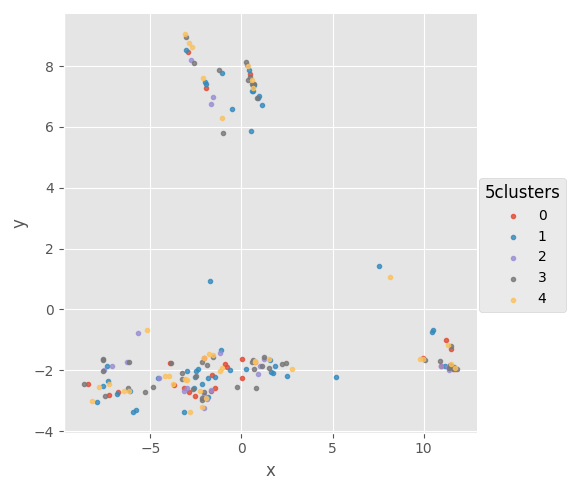

In [69]:
lm = sns.lmplot('x','y', X_pca, hue='5clusters',
           size=5, markers='.',fit_reg=False
            )

** Selection of 1 model out of cluster **

In [70]:
picked_models = []
cluster = {}
for i in range(n_clusters): #for each cluster
    mean_ck = {}
#     print "Cluster %i"%i
    min_mean_ck=9999
    cluster[i] = []
    for j,m in enumerate(ml_models):
        if Z[j]==i:
            
#             print ml_models[j]
            cluster[i].append(ml_models[j])
            models_not_in_cluster = [models for models in (set(ml_models)-set(cluster[i]))]
            X_outer_cluster = X.loc[models_not_in_cluster,:].mean()
            if min_mean_ck > X_outer_cluster[ml_models[j]]: #determine minimum mean cohens kappa value out of cluster
                min_mean_ck = X_outer_cluster[ml_models[j]]
                more_diverse_model = ml_models[j]
    
    # TODO: compute mean for those not in its own cluster
    print('\n%i %s \nmean C.K.= %.2f | f1: %.2f%% \n\n'%(i,more_diverse_model,min_mean_ck, 100*results_dict[more_diverse_model]['f1+'] ))
    picked_models.append(more_diverse_model)

    
# picked_models.append('CNN_test_CNN')


0 results_dict,ShortDepPath,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1)_RandomForestClassifier 
mean C.K.= 0.41 | f1: 53.00% 



1 biLSTM,RuS,lr=0.001,dropout=0.25,10epochs,max_sent_length=64_biLSTM 
mean C.K.= 0.32 | f1: 52.58% 



2 results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_RandomForestClassifier 
mean C.K.= 0.39 | f1: 52.00% 



3 results_dict,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_RandomForestClassifier 
mean C.K.= 0.38 | f1: 51.00% 



4 results_dict,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_SVC_linear 
mean C.K.= 0.44 | f1: 55.00% 




In [79]:
picked_models

['results_dict,trim=0,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_RandomForestClassifier',
 'results_dict,trim=0,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_LogisticRegression',
 'results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_RandomForestClassifier',
 'results_dict,trim=0,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=250',
 'results_dict,trim=0,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_RandomForestClassifier',
 'results_dict,trim=0,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=150']

Index([u'Model 0', u'Model 1', u'Model 2', u'Model 3'], dtype='object')


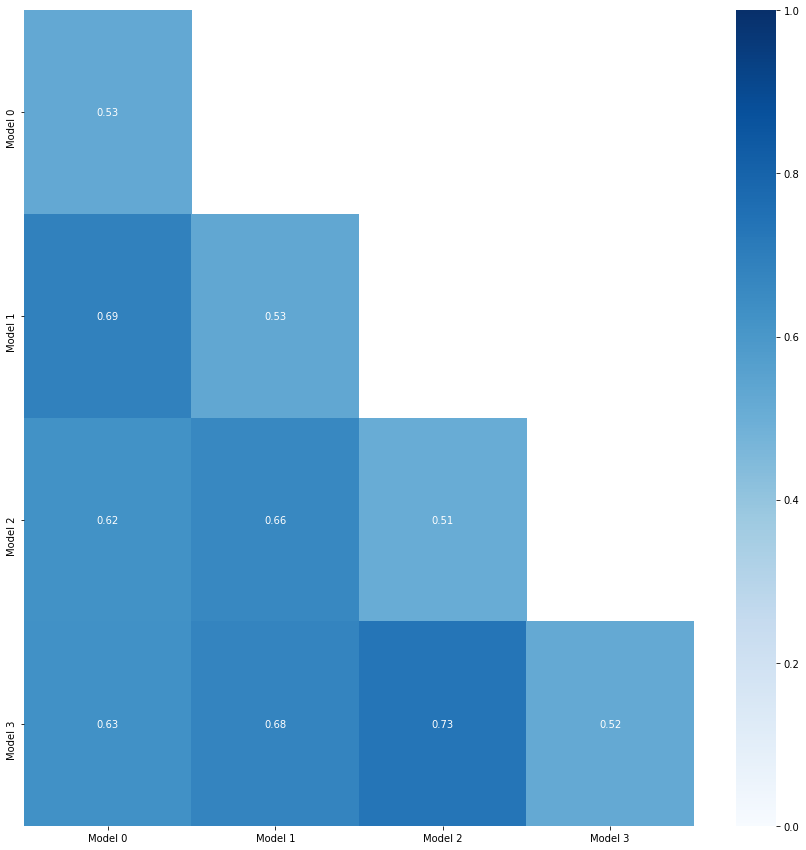

In [165]:
diversity_heatmap(reduce_results_dict(results_dict,picked_models), 
                  metric=accuracy_score, diagonal_key='f1+' ,plot_model_names=False,
                 figsize=(15,15)
                 )


# Load cands to get tp,fp etc

In [25]:
with open(path_candidate_dict_pkl, 'rb') as f:
    cand_dict = pickle.load(f)

In [26]:
# #get gold, pred lists from dicts for tp,fp etc
# ids = cand_dict[1].keys()

In [27]:
# classifier_name = 'RuS,lr=0.001,dropout=0.25,8epochs,rebalance=0,max_sent_length=64_biLSTM'

# classifier_dict = results_dict[classifier_name]

In [28]:
# y_val_pred = map(lambda x: 1 if results_dict[classifier_name]['label_val_prob+'][x]>=0.5 else -1, ids)

In [29]:
def get_tpfptnfn_cids(cand_dict, results_dict, classifier_name):
    """Get sets candidate ids of tp, fp, tn, fn"""
    
    ids = cand_dict[1].keys()
    y_val_gold = map(lambda x: cand_dict[1][x]['label'],ids)
    y_val_pred = map(lambda x: 1 if results_dict[classifier_name]['label_val_prob+'][x]>=0.5 else -1, ids)
    
    tp, fp,tn, fn= set(), set(), set(), set()
    for i, cid in enumerate(ids):
        true_lbl = y_val_gold[i]
        pred_lbl = y_val_pred[i]
#         print 'position', i, 'cid', cid, " | ",true_lbl,pred_lbl

    #     print cid
    #     print type(cid)
        if true_lbl==pred_lbl:
#             print 'correctly classified'
            if true_lbl==1:
#                 print 'true lbl==1'
                tp.add(cid)
            else:
                tn.add(cid)
        else:
            if true_lbl==1:
                fn.add(cid)
            else:
                fp.add(cid)
    return tp,fp,tn,fn


# Analysis - how many FN + FP over all our classifiers?

In [31]:
fp = {}
fn = {}
for model_name in picked_models:
    _, fp[model_name] , _, fn[model_name] = get_tpfptnfn_cids(cand_dict, results_dict, model_name)
    

In [41]:
# all common fp:
fps = [ fp[model_name] for model_name in picked_models]
print 'Always FPs: %i' %len(fps[0].intersection(*fps))


Always FPs: 26


In [42]:
# all common fn:
fns = [ fn[model_name] for model_name in picked_models]
print 'Always FNs: %i' %len(fns[0].intersection(*fns))


Always FNs: 19


# #TODO: new selection method (metric defined with David)


In [253]:
# step 1:calculate them again out of candidate dict

In [260]:
from itertools import  combinations

In [275]:
metrics = pd.DataFrame(columns=['metric1','metric2', 'metric3', 'metric4'])
for classifier_name1,classifier_name2 in combinations(picked_models, 2):
    
    tp1,fp1,tn1,fn1 = get_tpfptnfn_cids(cand_dict, results_dict, classifier_name1)
    tp2,fp2,tn2,fn2 = get_tpfptnfn_cids(cand_dict, results_dict, classifier_name2)
    
    print classifier_name1, '\n' , classifier_name2,'\n'
    ncTPs = len(tp1.difference(tp2))
    print 'Non-common TPs',ncTPs
    ncTNs = len(tn1.difference(tn2))
    print 'Non-common TNs',ncTNs
    
    ncFNs = len(fn1.difference(fn2))
    print 'Non-common FNs',ncFNs
    ncFPs = len(fp1.difference(fp2))
    print 'Non-common FPs',ncFPs

    total_mistakes = len(fp1)+len(fn1)+len(fp2)+len(fn2)
    print 'Total mistakes:', total_mistakes
    
    # Metric 1: Maximize non - common TP vs total mistakes made by both classifiers > 
    #     the second classifier could be  vote all positive
    metric1 = (float(ncTPs)/total_mistakes)
    print "************************"
    print "Metric 1:    |%.2f|"%metric1
    print "************************"
    
    # Metric 2: Maximize non - common TP+ non - common TN vs total mistakes made by both classifiers
    metric2 = (float(ncTPs+ncTNs)/total_mistakes)
    print "************************"
    print "Metric 2:    |%.2f|"%metric2
    print "************************"
    # Metric 3: Maximize non - common FP+ non - common FN vs total mistakes made by both classifiers
    metric3 = (float(ncFPs+ncFNs)/total_mistakes)
    print "************************"
    print "Metric 3:    |%.2f|"%metric3
    print "************************"
    # Metric 4: Maximize all non - common elmts vs total mistakes made by both classifiers
    metric4 = (float(ncFPs+ncFNs+ncTNs+ncTPs)/total_mistakes)
    print "************************"
    print "Metric 4:    |%.2f|"%metric4
    print "************************"
    
    comb_name = set((classifier_name1, classifier_name2))
#     comb_name = classifier_name1+' | '+classifier_name2
    
    metrics = metrics.append(
        pd.DataFrame({'metric1':metric1, 
                      'metric2': metric2,
                      'metric3': metric3,
                      'metric4': metric4,
                     }, index = [comb_name])
    )

results_dict,lemmas,RuS,CV_,bin_,minFreq=1,_ngrams=(1, 1),LSA100_LogisticRegression 
results_dict,RuS,CV_,bin_,minFreq=1,_stopw=english,_ngrams=(0, 3),LSA100_LogisticRegression 

Non-common TPs 87
Non-common TNs 194
Non-common FNs 95
Non-common FPs 317
Total mistakes: 1715
************************
Metric 1:    |0.05|
************************
************************
Metric 2:    |0.16|
************************
************************
Metric 3:    |0.24|
************************
************************
Metric 4:    |0.40|
************************
results_dict,lemmas,RuS,CV_,bin_,minFreq=1,_ngrams=(1, 1),LSA100_LogisticRegression 
results_dict,lemmas,RuS,TfIdf_,minFreq=1,_ngrams=(1, 1),LSA100_RandomForestClassifier 

Non-common TPs 68
Non-common TNs 250
Non-common FNs 114
Non-common FPs 284
Total mistakes: 1766
************************
Metric 1:    |0.04|
************************
************************
Metric 2:    |0.18|
************************
************************
Metric 3:   

Metric 2:    |0.31|
************************
************************
Metric 3:    |0.35|
************************
************************
Metric 4:    |0.66|
************************
results_dict,lemmas,RuS,TfIdf_,minFreq=1,_ngrams=(1, 1),LSA100_RandomForestClassifier 
results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=1,_stopw=english,_ngrams=(1, 1),LSA100_LogisticRegression 

Non-common TPs 112
Non-common TNs 276
Non-common FNs 96
Non-common FPs 301
Total mistakes: 1677
************************
Metric 1:    |0.07|
************************
************************
Metric 2:    |0.23|
************************
************************
Metric 3:    |0.24|
************************
************************
Metric 4:    |0.47|
************************
results_dict,lemmas,RuS,TfIdf_,minFreq=1,_ngrams=(1, 1),LSA100_RandomForestClassifier 
results_dict,ShortDepPath,RuS,CV_,bin_,minFreq=1,_ngrams=(0, 3),LSA100_SVC_linear 

Non-common TPs 110
Non-common TNs 221
Non-common FNs 98
Non-common FPs 42

RuS,lr=0.001,dropout=0.25,8epochs,rebalance=0,max_sent_length=64_biLSTM 
results_dict,trim=5,RuS,TfIdf_,minFreq=1,_stopw=english,_ngrams=(0, 3),LSA100_SVC_linear 

Non-common TPs 151
Non-common TNs 103
Non-common FNs 77
Non-common FPs 417
Total mistakes: 1316
************************
Metric 1:    |0.11|
************************
************************
Metric 2:    |0.19|
************************
************************
Metric 3:    |0.38|
************************
************************
Metric 4:    |0.57|
************************
RuS,lr=0.001,dropout=0.25,8epochs,rebalance=0,max_sent_length=64_biLSTM 
results_dict,lemmas,RuS,TfIdf_,minFreq=1,_stopw=english,_ngrams=(1, 1),LSA100_RandomForestClassifier 

Non-common TPs 107
Non-common TNs 451
Non-common FNs 153
Non-common FPs 308
Total mistakes: 1653
************************
Metric 1:    |0.06|
************************
************************
Metric 2:    |0.34|
************************
************************
Metric 3:    |0.28|
**

In [304]:
metrics.sort_values('metric4',ascending=False)

,metric1,metric2,metric3,metric4
"{RuS,lr=0.001,dropout=0.25,8epochs,rebalance=0,max_sent_length=64_biLSTM, results_dict,lemmas,RuS,TfIdf_,minFreq=1,_ngrams=(1, 1),LSA100_RandomForestClassifier}",0.112893,0.307835,0.347933,0.655768
"{results_dict,ShortDepPath,RuS,TfIdf_,minFreq=1,_ngrams=(0, 3),LSA100_SVC_linear, RuS,lr=0.001,dropout=0.25,8epochs,rebalance=0,max_sent_length=64_biLSTM}",0.079342,0.266619,0.378842,0.645461
"{results_dict,lemmas,RuS,CV_,bin_,minFreq=1,_ngrams=(1, 1),LSA100_LogisticRegression, RuS,lr=0.001,dropout=0.25,8epochs,rebalance=0,max_sent_length=64_biLSTM}",0.084656,0.265726,0.350970,0.616696
"{RuS,lr=0.001,dropout=0.25,8epochs,rebalance=0,max_sent_length=64_biLSTM, results_dict,lemmas,RuS,TfIdf_,minFreq=1,_stopw=english,_ngrams=(1, 1),LSA100_RandomForestClassifier}",0.064731,0.337568,0.278887,0.616455
"{results_dict,ShortDepPath,RuS,CV_,bin_,minFreq=1,_ngrams=(0, 3),LSA100_SVC_linear, RuS,lr=0.001,dropout=0.25,8epochs,rebalance=0,max_sent_length=64_biLSTM}",0.062762,0.264993,0.350070,0.615063
"{fasttext_fasttext, results_dict,lemmas,RuS,TfIdf_,minFreq=1,_ngrams=(1, 1),LSA100_RandomForestClassifier}",0.171153,0.222222,0.385783,0.608006
"{results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=1,_stopw=english,_ngrams=(1, 1),LSA100_LogisticRegression, RuS,lr=0.001,dropout=0.25,8epochs,rebalance=0,max_sent_length=64_biLSTM}",0.056452,0.319479,0.284739,0.604218
"{results_dict,RuS,TfIdf_,minFreq=1,_stopw=english,_ngrams=(0, 3),LSA100_NeuralNet(10,10), RuS,lr=0.001,dropout=0.25,8epochs,rebalance=0,max_sent_length=64_biLSTM}",0.066838,0.300771,0.300771,0.601542
"{results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=1,_stopw=english,_ngrams=(1, 1),LSA100_RandomForestClassifier, RuS,lr=0.001,dropout=0.25,8epochs,rebalance=0,max_sent_length=64_biLSTM}",0.088501,0.302972,0.297804,0.600775
"{results_dict,trim=5,RuS,TfIdf_,minFreq=1,_stopw=english,_ngrams=(0, 3),LSA100_SVC_linear, results_dict,lemmas,RuS,TfIdf_,minFreq=1,_ngrams=(1, 1),LSA100_RandomForestClassifier}",0.151340,0.189718,0.410572,0.600290


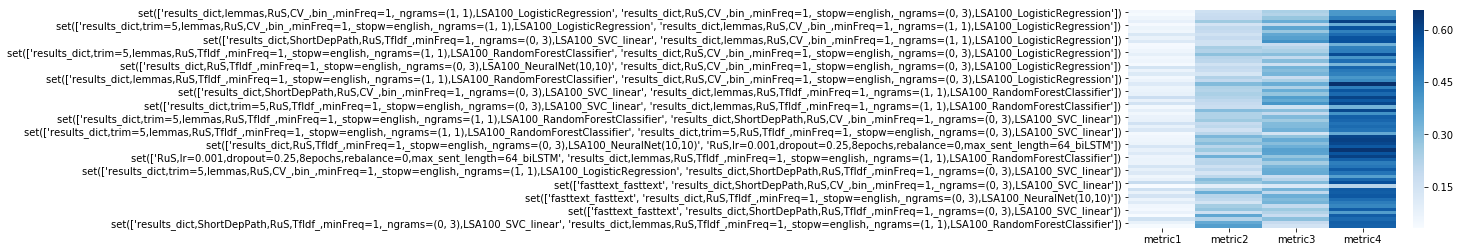

In [277]:
sns.heatmap(metrics,cmap='Blues')

In [317]:
num_class=8 #must be even number
picked_classif = set()
# pick the 1st pair
# sorted_list = metrics.sort_values('metric4',ascending=False).index
picked_classif.update(metrics.sort_values('metric4',ascending=False).index[0])
for i in range(1,len(metrics)):
    possible_set = metrics.sort_values('metric4',ascending=False).index[i]
    if len(picked_classif.intersection(possible_set))==0:
        #add those two in the stack too
        picked_classif.update(possible_set)
        if len(picked_classif)>=num_class: #limit the # of classifiers which are picked
            break

In [318]:
picked_classif

{'RuS,lr=0.001,dropout=0.25,8epochs,rebalance=0,max_sent_length=64_biLSTM',
 'fasttext_fasttext',
 'results_dict,ShortDepPath,RuS,CV_,bin_,minFreq=1,_ngrams=(0, 3),LSA100_SVC_linear',
 'results_dict,ShortDepPath,RuS,TfIdf_,minFreq=1,_ngrams=(0, 3),LSA100_SVC_linear',
 'results_dict,lemmas,RuS,CV_,bin_,minFreq=1,_ngrams=(1, 1),LSA100_LogisticRegression',
 'results_dict,lemmas,RuS,TfIdf_,minFreq=1,_ngrams=(1, 1),LSA100_RandomForestClassifier',
 'results_dict,trim=5,RuS,TfIdf_,minFreq=1,_stopw=english,_ngrams=(0, 3),LSA100_SVC_linear',
 'results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=1,_stopw=english,_ngrams=(1, 1),LSA100_LogisticRegression'}

In [312]:
# diversity_heatmap(reduce_results_dict(results_dict,picked_models), 
#                   metric=accuracy_score, diagonal_key='f1+', 
#                   evaluate_on = "label_val_prob+",
#                   title='Diversity heatmap for 3 models picked by clustering (metric: accuracy)', )

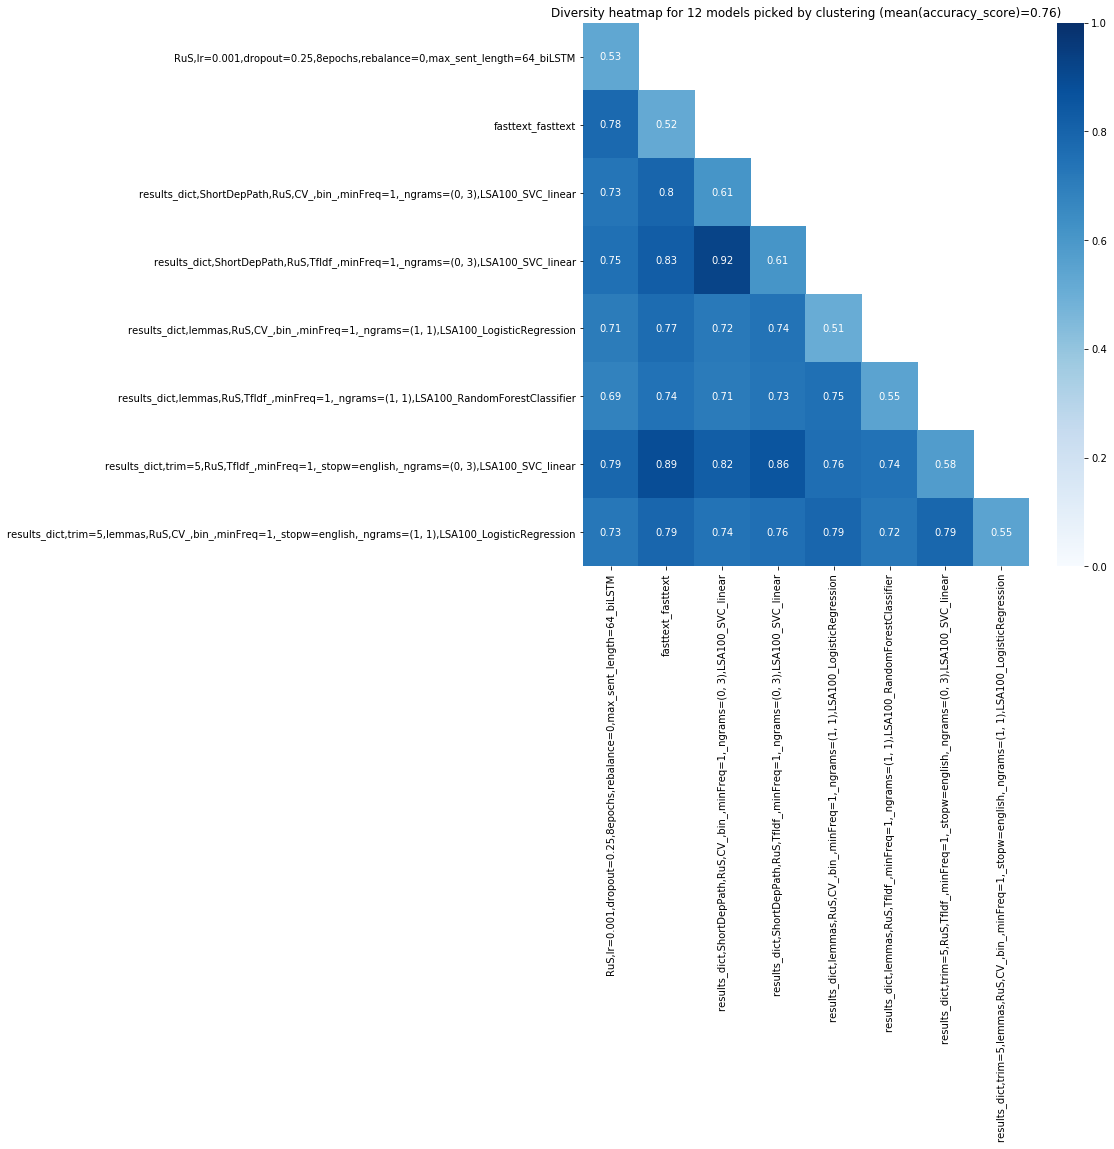

In [319]:
metric = accuracy_score

mean = diversity_matrix(
    reduce_results_dict(results_dict,picked_classif),
    metric=accuracy_score,
    diagonal_key=None
).mean().mean()

diversity_heatmap(reduce_results_dict(results_dict,picked_classif), 
                  metric=metric, diagonal_key='f1+', 
                  evaluate_on = "label_unlab_prob+",
                  title='Diversity heatmap for %i models picked by clustering (mean(%s)=%.2f)'%(
                      len(picked_models),metric.__name__, mean) )

## Save results in a new pickle

In [166]:
selected_class_dict = reduce_results_dict(results_dict, picked_models)

In [167]:
selected_class_dict.keys()

['results_dict,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_RandomForestClassifier',
 'results_dict,ShortDepPath,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1)_RandomForestClassifier',
 'biLSTM,RuS,lr=0.001,dropout=0.25,10epochs,max_sent_length=64_biLSTM',
 'results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3),LSA200_RandomForestClassifier']

In [168]:

for name in selected_class_dict.keys():
    print(name)
    print(results_dict[name]['classification_report'])

results_dict,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_RandomForestClassifier
           precision  recall  f1-score  support
Classes                                        
-1              0.92    0.62      0.74     2532
1               0.37    0.81      0.51      710
avg/total       0.80    0.66      0.69     3242
results_dict,ShortDepPath,lemmas,RuS,TfIdf_,minFreq=5,_stopw=english,_ngrams=(1, 1)_RandomForestClassifier
           precision  recall  f1-score  support
Classes                                        
-1              0.90    0.73      0.81     2532
1               0.42    0.70      0.53      710
avg/total       0.79    0.73      0.75     3242
biLSTM,RuS,lr=0.001,dropout=0.25,10epochs,max_sent_length=64_biLSTM
           precision  recall  f1-score  support
Classes                                        
-1              0.87    0.84      0.86     2532
1               0.50    0.56      0.53      710
avg/total       0.79    0.78      0.78     3242
results_dict,trim=5,lemmas

In [169]:
with open(path_base_learners+'/4models.pickle' ,'wb') as f:
    pickle.dump(selected_class_dict,f)

In [42]:
# for i,m in enumerate(ml_models):
#     print Z[i], '\t', m
#     # for each cluster, pick model with lowest 

# ~

Making the plot for multiple categorical variables types

In [53]:
cats1 = 'model'
cats2 = 'trimming'

In [55]:
cat1i

array(['CNN', 'LSTM', 'LogisticRegression', 'RandomForestClassifier',
       'SVC_linear', 'SVC_rbf'], dtype=object)

In [49]:
cat2_obj

array(['ShortDepPath', 'no_trim', 'trim=0', 'trim=5'], dtype=object)

In [57]:
cat1 = cat1i[0]

In [67]:
X_tsne[(X_tsne[cats1]==cat1) & (X_tsne[cats2]==cat2)][['x','y']]

,x,y


In [78]:
for x, y in X_tsne[(X_tsne[cats1]==cat1) & (X_tsne[cats2]==cat2)][['x','y']].values:
    print 'eeee'
    print 

eeee
-28.469893 -284.921
eeee
7.454082 -286.5589
eeee
-45.355446 -256.35284
eeee
-101.9468 75.471016


In [157]:
# # Trying to add voronoi diagrams too
# reduced_data = np.array(X_tsne[['x','y']])
# h = .1 

# # Plot the decision boundary. For that, we will assign a color to each
# x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
# y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])

# plt.imshow(Z, interpolation='nearest',
#            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#            cmap=plt.cm.Paired,
#            aspect='auto', origin='lower')

In [ ]:
cats1 = 
cats2 = 

In [57]:
import itertools
import numpy as np
from matplotlib import markers
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


def visualize_classifiers(X_tsne, cat_var1 = 'model', cat_var2 = 'trimming' , style = 'ggplot'):
    """2-D Visualization with options for two categorical values
    
    X: should contain columns 'x' and 'y'
    cat_var1
    """
    
    cat1i = np.unique(X_tsne[cat_var1])
    cat2i = np.unique(X_tsne[cat_var2])

    plt.figure(figsize=(10,10))
    plt.style.use(style)
    markers = ['*','o','v','+','^','>','<','p','.','h','H','D','d','1','','']
    colors = plt.cm.Set1.colors
    color_patches, marker_patches = [], []

    for j, cat2 in enumerate(cat2i):
        marker_patches.append(mlines.Line2D([], [], color='black', marker=markers[j], linestyle='None',
                          markersize=4, label=cat2) )

    for i, cat1 in enumerate(cat1i):
        color_patches.append(mpatches.Patch(color=colors[i], label=cat1))

        for j, cat2 in enumerate(cat2i):
            for x,y in  X_tsne[(X_tsne[cat_var1]==cat1) & (X_tsne[cat_var2]==cat2)][['x','y']].values:
                plt.scatter(x, y, 
                            color=colors[i],marker=markers[j])


    # plt.legend(handles=color_patches, ncol=2, loc=2, bbox_to_anchor=(1.05, 1),)
    # plt.legend(handles=marker_patches, ncol=2, loc=2, bbox_to_anchor=(1.05, 1),)



    legend1 = plt.legend(handles=color_patches, ncol=1, loc=2, bbox_to_anchor=(1.05, 1),)
    plt.legend(handles=marker_patches, ncol=1, loc=3, bbox_to_anchor=(1.05, 0),)
    plt.gca().add_artist(legend1)
    plt.title("Visualization of different classifiers based on their predictions")
    return plt

    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,ncol=2);



<module 'matplotlib.pyplot' from '/home/antonis/anaconda2/envs/snorkel27/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

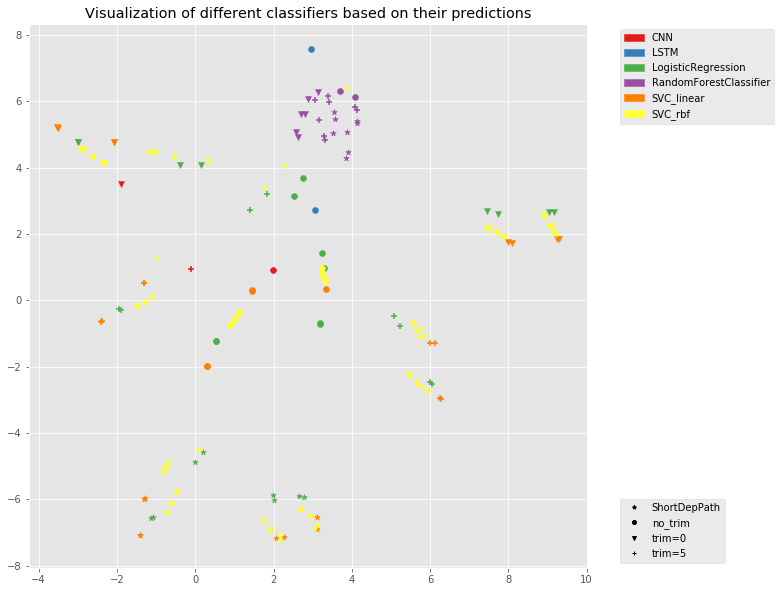

In [58]:
visualize_classifiers(X_tsne, )

In [39]:
import itertools
import numpy as np
from matplotlib import markers
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

plt.style.use('ggplot')
markers = ['*','o','v','^','>','<','s','p','.','h','H','D','d','1','','']
colors = plt.cm.Set1.colors
color_patches, marker_patches = [], []

for j, cat2 in enumerate(cat2i):
    marker_patches.append(mlines.Line2D([], [], color='black', marker=markers[j], linestyle='None',
                      markersize=4, label=cat2) )

for i, cat1 in enumerate(cat1i):
    color_patches.append(mpatches.Patch(color=colors[i], label=cat1))
    
    for j, cat2 in enumerate(cat2i):
        for x,y in  X_tsne[(X_tsne[cats1]==cat1) & (X_tsne[cats2]==cat2)][['x','y']].values:
            plt.scatter(x, y, 
                        color=colors[i],marker=markers[j])

            
# plt.legend(handles=color_patches, ncol=2, loc=2, bbox_to_anchor=(1.05, 1),)
# plt.legend(handles=marker_patches, ncol=2, loc=2, bbox_to_anchor=(1.05, 1),)



legend1 = plt.legend(handles=color_patches, ncol=1, loc=2, bbox_to_anchor=(1.05, 1),)
plt.legend(handles=marker_patches, ncol=1, loc=3, bbox_to_anchor=(1.05, 0),)
plt.gca().add_artist(legend1)
plt.title("Visualization of different classifiers based on their predictions")
plt.show()

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,ncol=2);



## Clustering on tSNE results

Text(0,0.5,'Silhouette score')

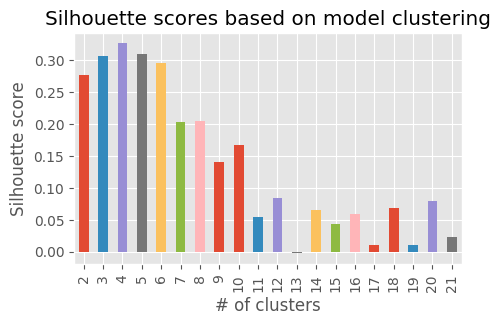

In [129]:
# Evaluate nr of clusters needed
silh_score = pd.Series(index=range_n_clusters)

for n_clusters in range_n_clusters:
    
    clusterer =  KMeans(n_clusters=n_clusters )
    cluster_labels = clusterer.fit_predict(X_tsne[['x','y']])
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    silh_score.loc[n_clusters] = silhouette_avg
    
plt.style.use('ggplot')
silh_score.plot(figsize=(5,3), kind='bar',
                title='Silhouette scores based on model clustering')
plt.xlabel('# of clusters')
plt.ylabel('Silhouette score')


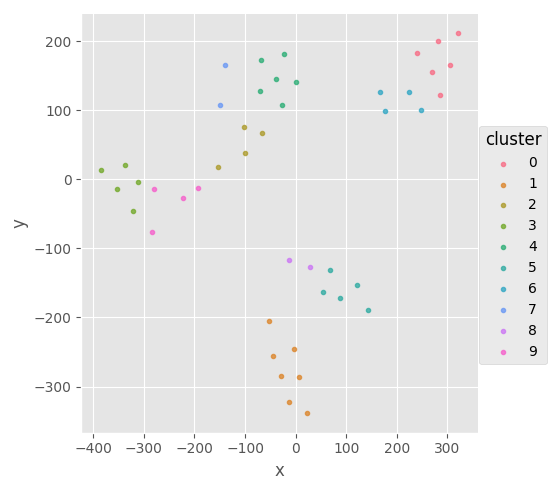

In [158]:
n_clusters = 10

clusterer =  KMeans(n_clusters=n_clusters )
X_tsne['cluster']  = clusterer.fit_predict(X_tsne[['x','y']])

lm = sns.lmplot('x','y', X_tsne, hue='cluster',
           size=5, markers='.',fit_reg=False
            )

In [160]:
clusterer.cluster_centers_

array([[ 283.7637914 ,  173.1447169 ],
       [ -15.96700866, -277.07409668],
       [-105.43010902,   49.71821928],
       [-341.7906189 ,   -5.71956038],
       [ -37.82847338,  146.51580302],
       [  94.87389145, -161.97250671],
       [ 203.65054703,  113.31389999],
       [-144.41480255,  136.59853363],
       [   8.25118494, -121.23590088],
       [-245.05366516,  -32.21572566]])

In [162]:
X_tsne[['x','y']]

,x,y
"CNN_no_trim,RuS_CNN",-12.573087,-116.079887
"CNN_trim=0,RuS_CNN",-284.149231,-75.562218
"CNN_trim=5,RuS_CNN",-51.951210,-205.043625
biLSTM_biLSTM_lr=0.001,-149.320862,108.042679
biLSTM_biLSTM_lr=0.01,-139.508743,165.154388
"results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_LogisticRegression",281.016235,200.063370
"results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_RandomForestClassifier",0.818901,141.710175
"results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_SVC_linear",321.320862,212.721191
"results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=150",269.099030,155.413177
"results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=250",305.046570,165.315094


In [166]:
closest_index

34

In [33]:
from scipy.spatial import distance
def centroid_selection(X, clusterer):
    """X should contain x,y columns with the tSNE projections
    clusterer 
    """
    picked_models = []
    clusterer.fit_predict(X[['x','y']])
    
    for center in clusterer.cluster_centers_:
        print center
        closest_index = distance.cdist(center.reshape(-1,2), X[['x','y']]).argmin()
        picked_models.append(X.index[closest_index])
    return picked_models

In [178]:
centroid_selection(X_tsne, KMeans(n_clusters=10))

[ -15.96700866 -277.07409668]
[-144.41480255  136.59853363]
[283.7637914 173.1447169]
[-324.77271816  -16.87254752]
[  35.02980256 -134.49769974]
[-37.82847338 146.51580302]
[-89.15373993  60.13653564]
[203.65054703 113.31389999]
[ 116.91753896 -171.44784546]
[-190.00598145   -6.96320057]


['results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=150',
 'biLSTM_biLSTM_lr=0.001',
 'results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=250',
 'results_dict,trim=0,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=150',
 'results_dict,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_SVC_linear',
 'results_dict,trim=0,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_RandomForestClassifier',
 'results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=250',
 'results_dict,ShortDepPath,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=150',
 'results_dict,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_LogisticRegression',
 'results_dict,trim=0,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=150']

In [177]:
from MLutils import reduce_results_dict

In [179]:
models10 = reduce_results_dict(results_dict,picked_models)

In [181]:
from sklearn.metrics import accuracy_score

Index([u'CNN_no_trim,RuS_CNN', u'biLSTM_biLSTM_lr=0.001',
       u'results_dict,ShortDepPath,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=250',
       u'results_dict,ShortDepPath,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=150',
       u'results_dict,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=250',
       u'results_dict,trim=0,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_LogisticRegression',
       u'results_dict,trim=0,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_RandomForestClassifier',
       u'results_dict,trim=0,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=250',
       u'results_dict,trim=5,lemmas,RuS,CV_,bin_,minFreq=5,_ngrams=(0, 3)_SVC_rbf_C=150',
       u'results_dict,trim=5,lemmas,RuS,TfIdf_,minFreq=5,_ngrams=(0, 3)_LogisticRegression'],
      dtype='object')


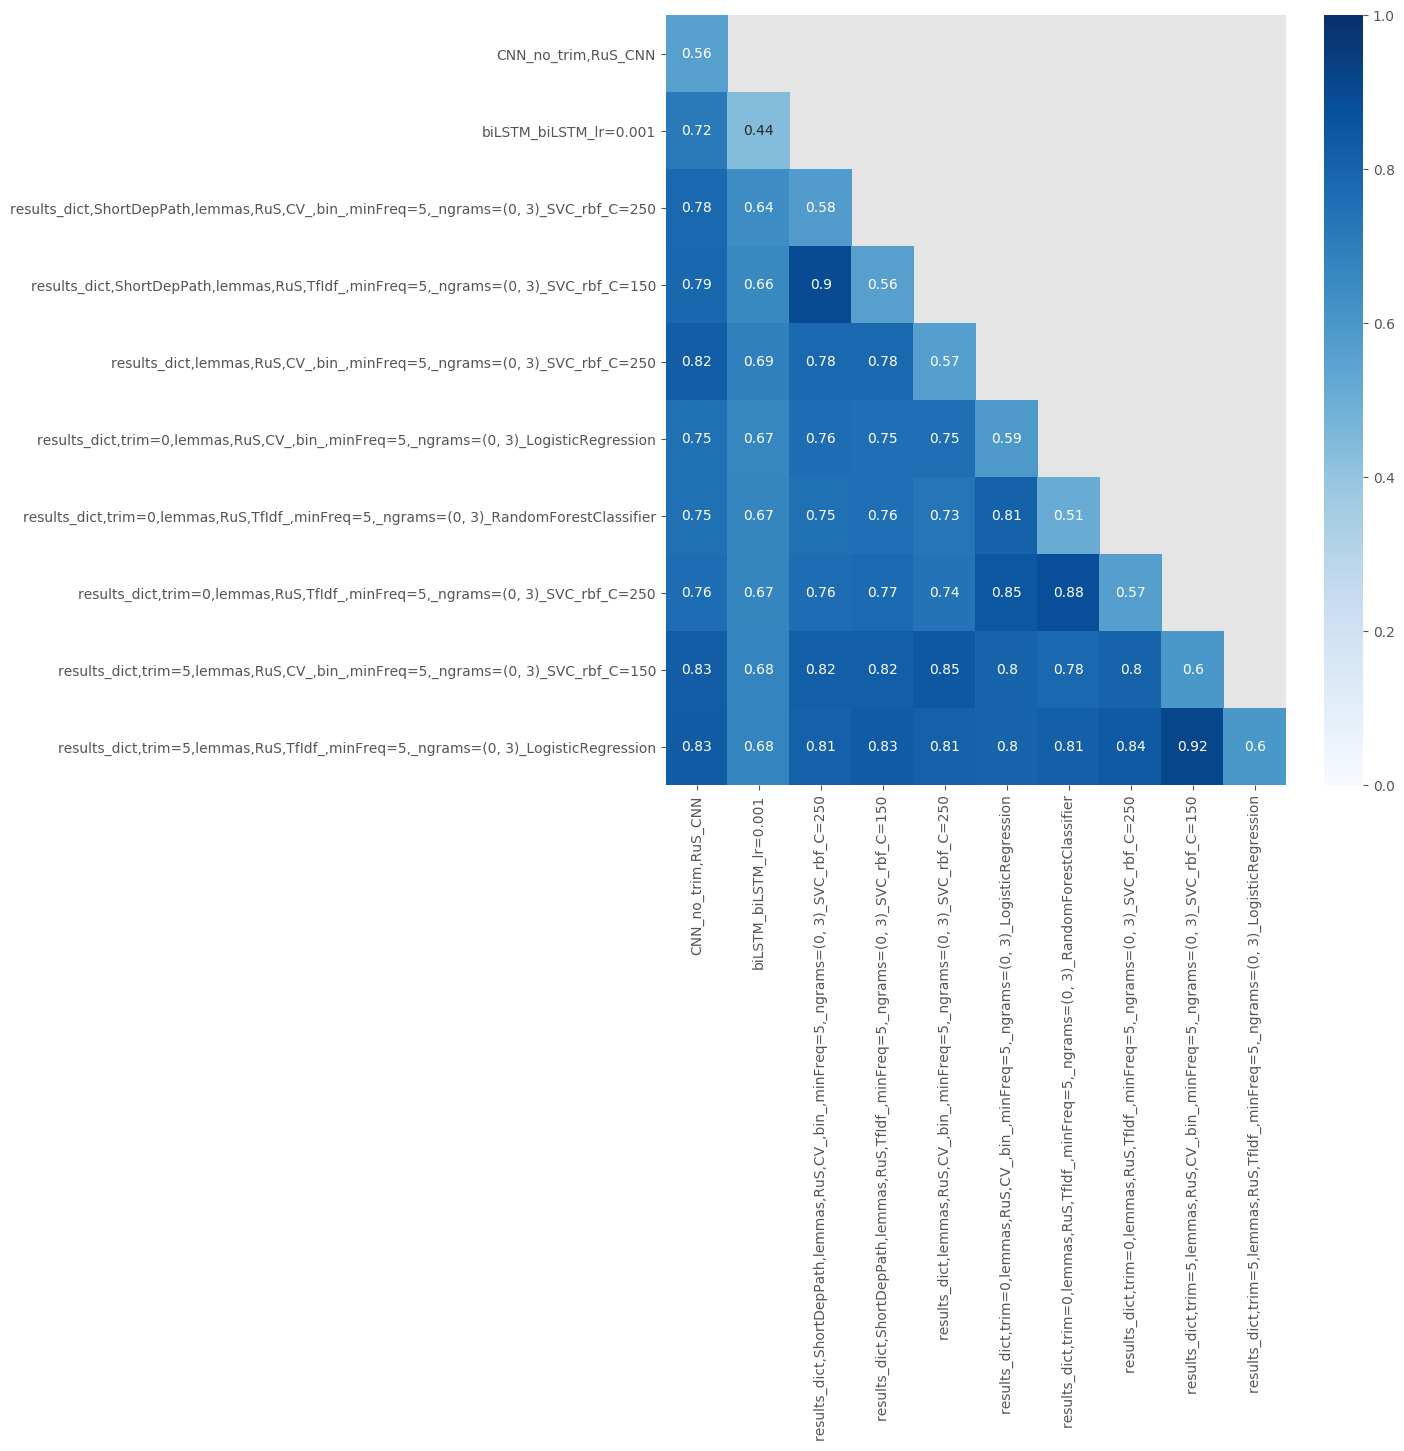

In [183]:
diversity_heatmap(models10, metric=accuracy_score,diagonal_key='f1+')

In [184]:
import pickle

In [186]:
with open(path_base_learners+'/10models_tSNE_kmeans.pickle' ,'wb') as f:
    pickle.dump(models10,f)